# Traffic Signal and Traffic Violations in the city of Cologne.

To increase traffic efficiency and safety, this data science project will examine Cologne's traffic violations and traffic signal positions. The relationship between the trafic volations and the traffic signals can be understood by merging reported fines data from the year 2021(past datasets are also available from 2015 but for now we are only using first 3 months of 2021) with the dataset of traffic signals in the city of Cologne. Data integration, exploratory data analysis, and the creation of conclusions and suggestions are all parts of the project.

### Data Sources and its explanation

Data source 1: Ampelanlagen Koeln (Traffic Signals in Cologne).

The information like Traffic signal number, Address, Latitude & Longitude of the locations are present in the data. 

Data source 2: Bußgelddaten Koeln (Fine data Cologne)

The information like the violation date, type of vehicle that was involved in violation, address of the violation location, type of violation is mostly covered in this data.

### Data Pipeline. 
The 2 files involved in the data pipeline:
1. fetchData.ipynb
2. mergeData.ipynb


1. fetchData.ipynb:
    This file is used to first fetch both the datasets from its source urls.
    Further necessary data columns were added according to the necessicity of the project.

    The steps involved in this were as follows: 
    
    * The zipcodes were added to the traffic signal dataset to associate every signal to the zipcode address for futher analysis.
    * Using the address of the violations the latitude and longitude was obtained for the geo location of the violations.
    * Both the datasets were saved to be further used by the merge file. 
    
    Challenges faced: 
    
        * The Nominatim APi was used from geopy library. The data was obtained using the online API and it took alot of time to get the latitude and longitude. The violations in the file for the year 2021 were more than 500k. 
        * To overcome the time limitation the local API creation was tried. For this a local ubuntu system was set up and POSTGRESQL data base was required to be set up. After setting up the required ubuntu system the main problems were revealed like the system limitations in terms of memory and RAM were the bigger hurdels in all of this. To further progress in the project instead of solving hardware issues a decision was made to just use the first 3 months of the year 2021 which consisted of roughly 145k entries. 
        * For getting the latitude and longitude for every violation location for just 3 months using online API it took roughly 30 hours. 


2. mergeData.ipynb: 
    This file first loads the datasets created from the previous step and combined.

    The steps involved in this file were as follows: 

    * For the violation data, using the latitude and longitude of the violations and traffic signals the closest traffic signal was identified and added the column in that dataset. 
    * This LSA_Nr column became the key value in merging the datasets. 
    * The merged dataset was then saved in csv format as *finalData.csv*.


### Exploratory data Analysis. 

*The month wise violations are plotted*

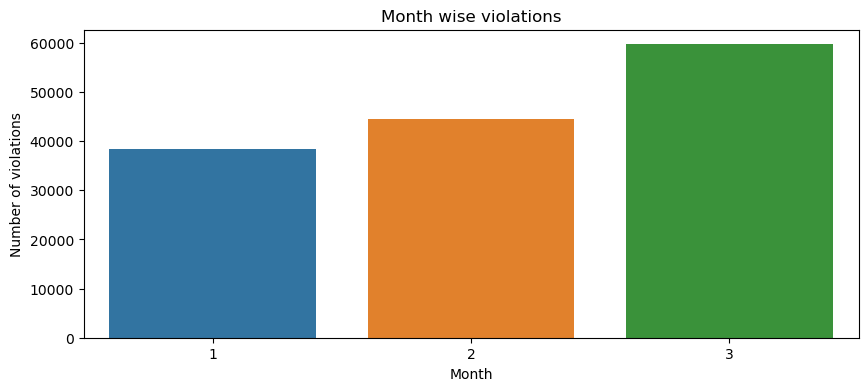

*Spatial Locations of Violations and Traffic Signals*

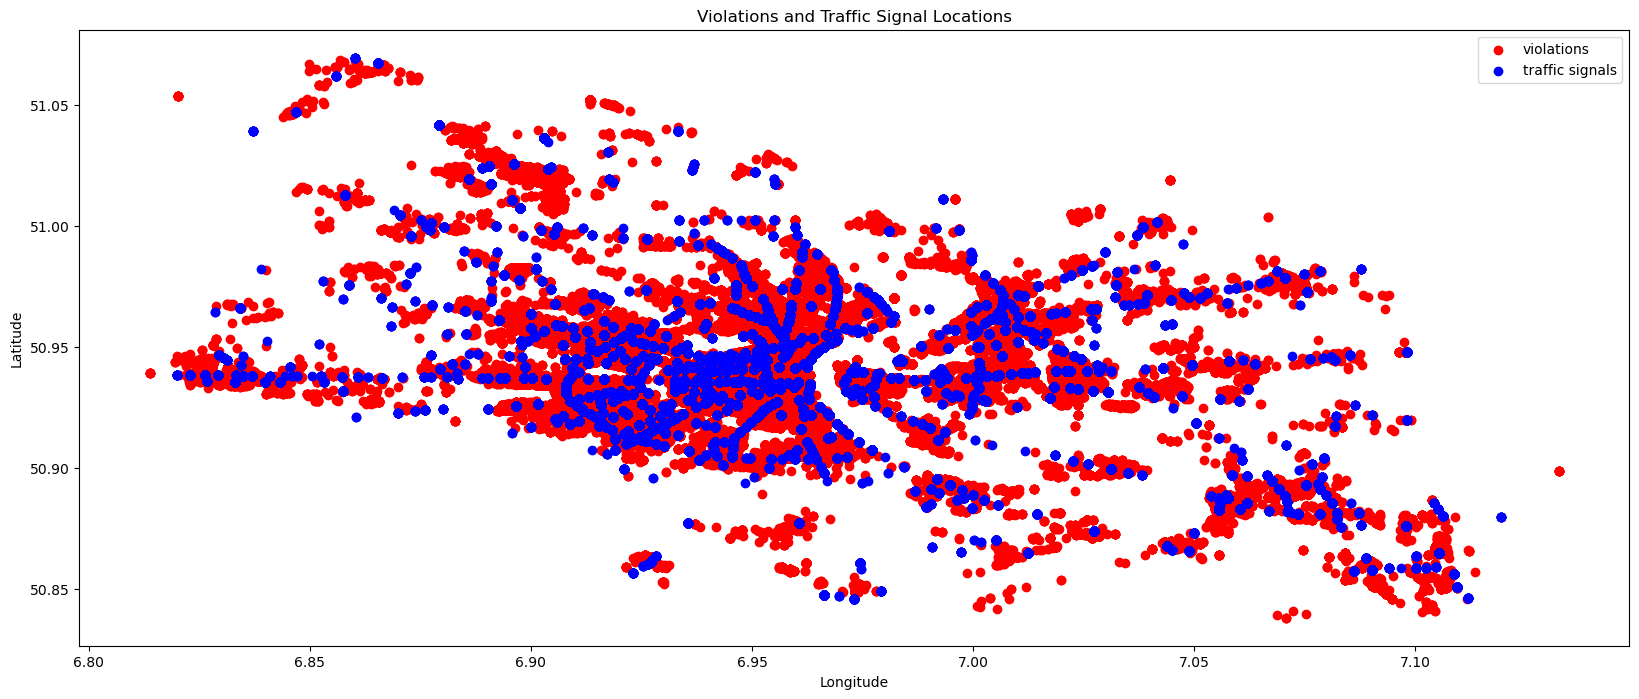

For furthur analysis, the count columns with vehicle and violation type are ignored. The vehicles type were large in number to find relationship. The violations were given in a form of its identification code and to understand its underlying meaning, needed a thorough study of traffic law.

The distance of the violations from the traffic signal was obtained using Haversine formula. The function returns the straight line aerial distance between two geocordinate in kilometers.

Further, the data was grouped by using zip code and zip code data was formed. It has following columns: 

zipcode, number of traffic signals, number of violations, mean distance of violations from the traffic signals. This data was furthur plotted to get graphical representaion zipcode wise. 

* *Violation counts in each Zipcode area*

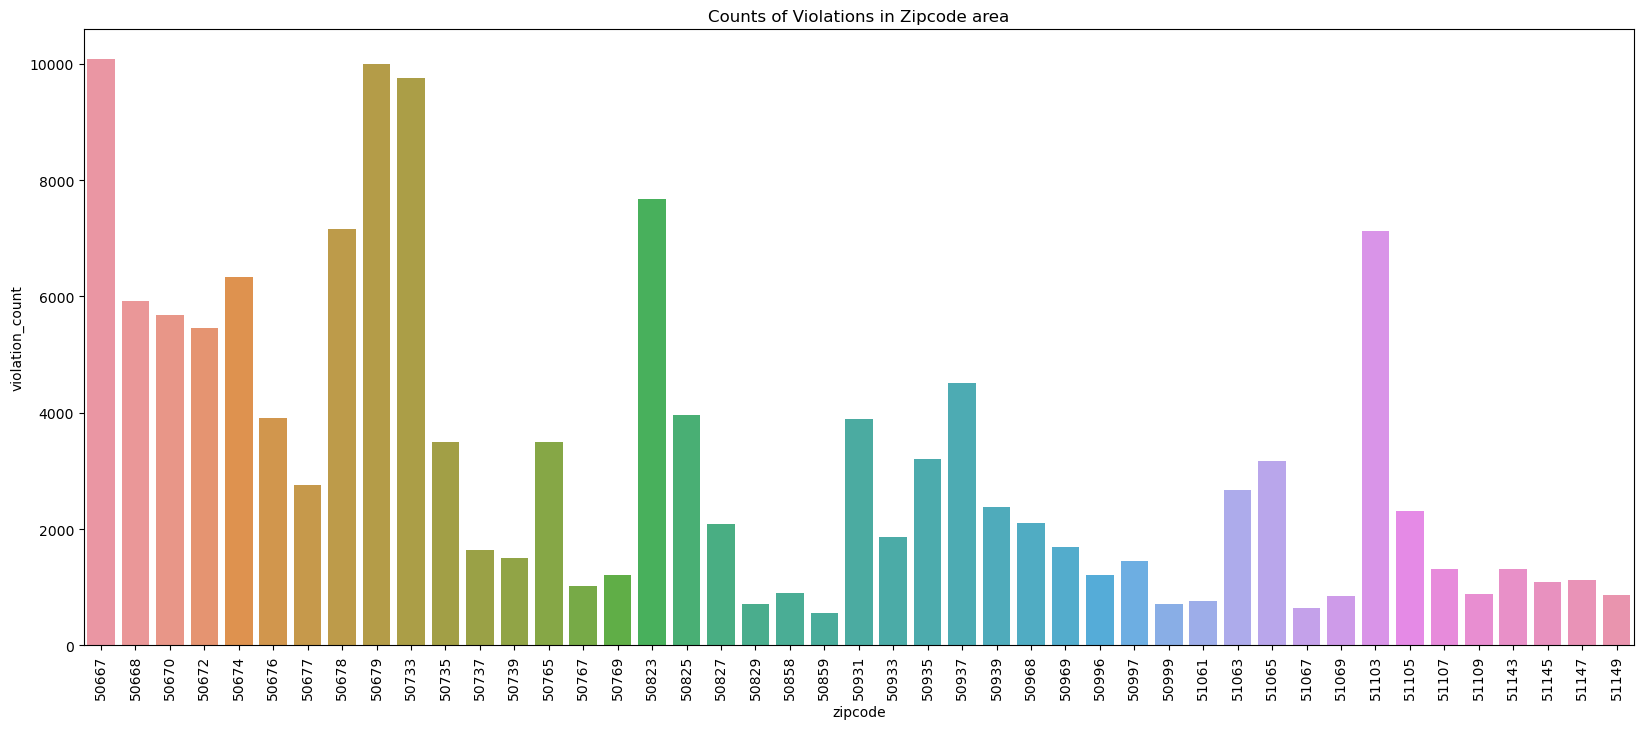

* *Traffic signal counts in each Zipcode area*

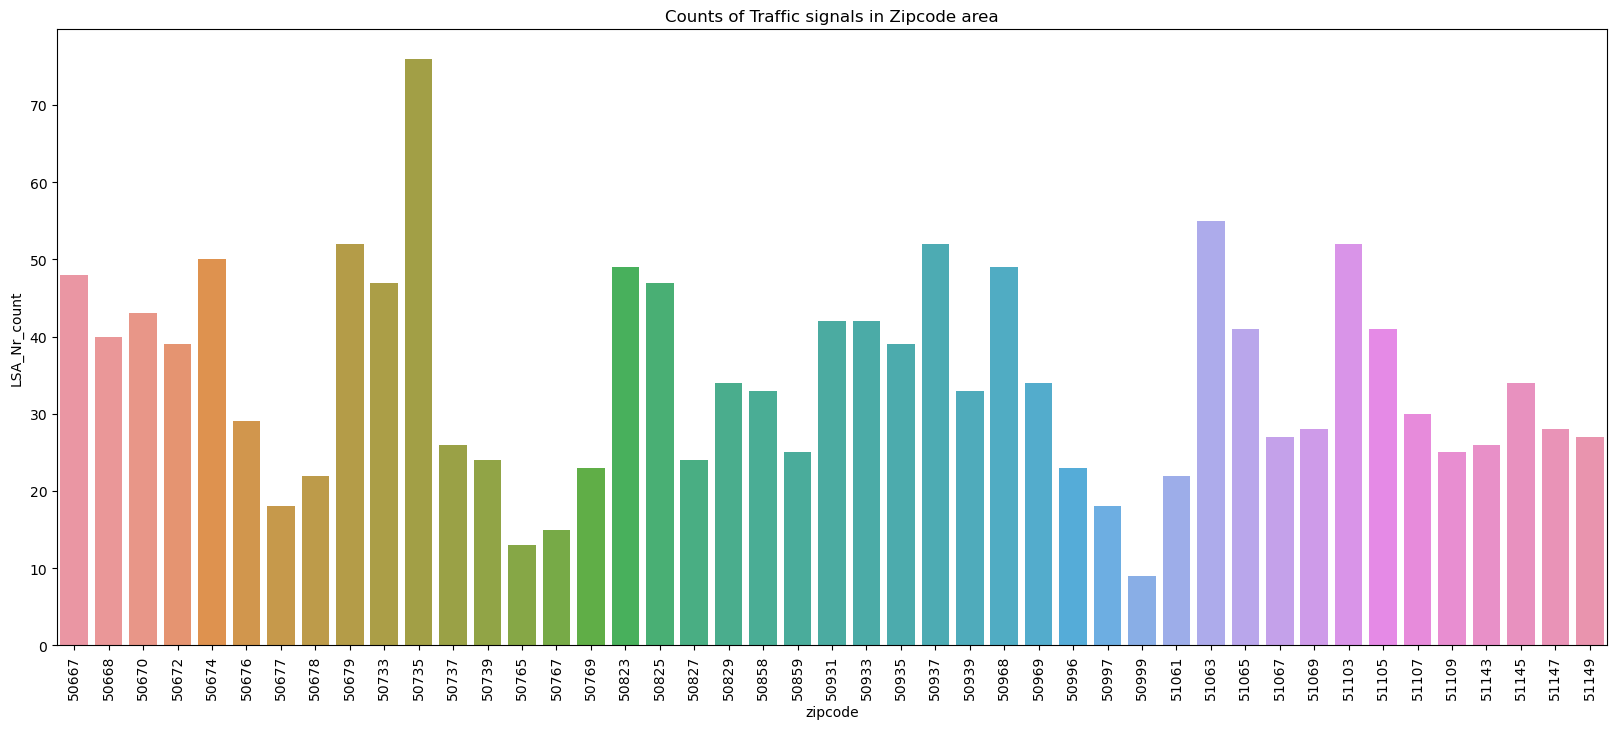

* *Mean distance of violations from traffic signals in each Zipcode area*

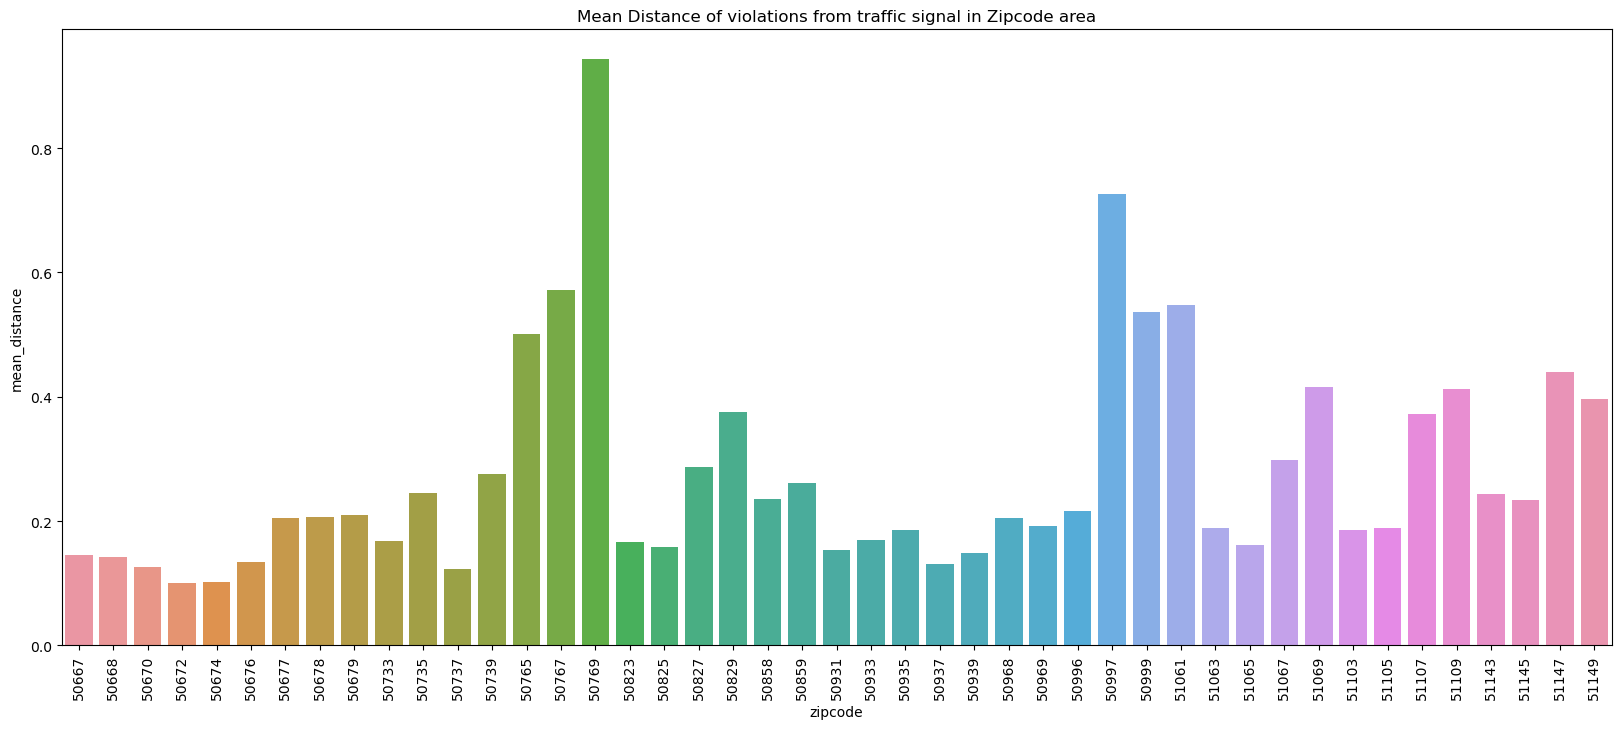

### Hypotheses Testing


We test the following hypotheses

##### Hypothesis 1: 
Null hypothesis (H0): There is no difference in the number of violations between zipcodes with different distances from the signal.

Alternative hypothesis (Ha): There is a significant difference in the number of violations between areas with larger and shorter distances from the signal.

*Distance from signal vs. Violation count scatter plot*

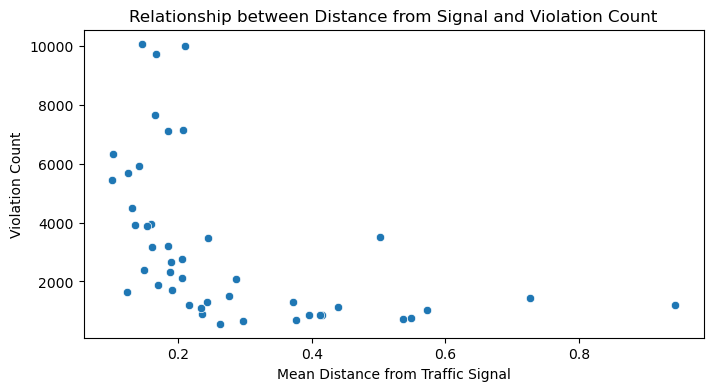

Correlation Analysis:

    The correlation between violation count and mean distance of the violation from traffic signal in the zipcode is -0.47. This indicates negative correlation meaning lower the distance higher the violation count in that zipcode area. 


2 groups were formed for zipcodes with larger distance of violation and shorter distance. This was formed by divig the zipcodes based on the median value of the mean distance. 

The average number of violations in both the groups were as follows:

    Mean Violations (Larger Distance): 1690.8181818181818

    Mean Violations (Shorter Distance): 4577.95652173913

After performing the t -test. The follwoing statistics were obtained:

    T-Statistic: -4.235628718167968
    
    P-Value: 0.00011791274803307264
    
**Decision: Reject the null hypothesis.**

#### Conclusion: 
The correlation analysis suggests the negative correlation between the mean distance of the violation from traffic signal and number of violations.
The mean violations in the group with larger distance from traffic signal(1691) is less that group with shorter distance(4578). This difference is statistically significant as well. We can therefore conclude that the traffic signals are responsible for catching the violations more efficiently in its vicinity. 

##### Hypothesis 2: 
Null hypothesis (H0): There is no difference in the number of violations between zipcodes despite of signal count.

Alternative hypothesis (Ha): There is a significant difference in the number of violations between areas with more traffic signals vs less traffic signals.

*Number of signals  vs. Violation count scatter plot*

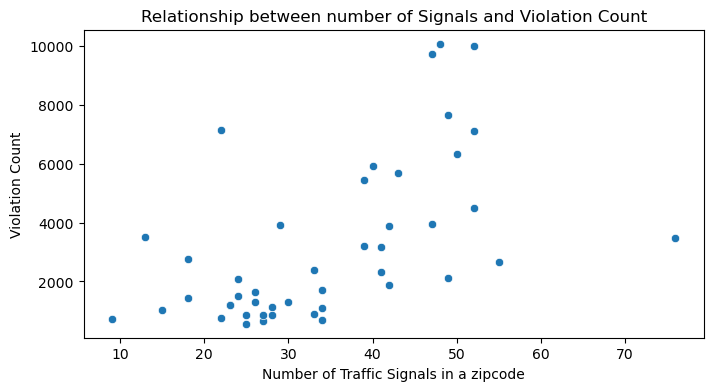

Correlation Analysis:

    The correlation between violation count and number of traffic signals in the zipcode is 0.55. This indicates positive correlation meaning higher the number of traffic signals, higher is the violation count in that zipcode area. 


2 groups were formed for zipcodes with more traffic signals and less traffic signals. This was formed by dividing the zipcodes based on the median value of the traffic signal counts. 

The average number of violations in both the groups were as follows:

    Mean Violations (More Signals): 4669.545454545455

    Mean Violations (Less Signals): 1728.7391304347825

After performing the t -test. The follwoing statistics were obtained:

    T-Statistic: 4.348536518952554
    
    P-Value: 8.264037986938899e-05
    
**Decision: Reject the null hypothesis.**

#### Conclusion: 
The correlation analysis suggests the positive correlation between the number of traffic signals and number of violations.
The mean violations in the group with more traffic signals(4670) is more than the group with less traffic signals(1729). This difference is statistically significant as well. We can therefore conclude that the traffic signals are responsible for catching the violations more efficiently. 

#### Further Outlook:

We can summarize that the presence of higher number of traffic signals in area results in catching more traffic violations. Also the traffic signals are more efficient in catching traffic violations in its close vicinity. This is probably because of the presence of camera and high vehicle density around traffic signals. Also, there is high chance of breaking the traffic singals which may result in adding the count of traffic violations very close to the traffic signal.

The less traffic violations are not necessarily the indicators that there is no violation incident. It is more or less associated to the inability to catch the violations due to low checks. The addition of monitoring devices in such locations could help in understanding it better.

Both the Hypotheses could make us understand the importance of having checks over the traffic flow in order to maintain the discipline. This can be further analysed by adding more data and using advanced Data Science algorithms. 